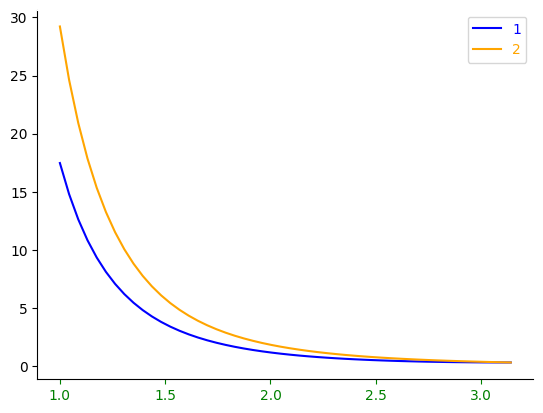

In [124]:
import numpy as np
import matplotlib.pyplot as plt
(3+np.cos(1/2)**2)**2/np.sin(1/2)**4/2**2
1/0.13**3
b=0.7
x = np.linspace(1,np.pi)
y = 1/np.sin(x/2)**4-b/np.sin(x/2)
a = np.pi**4*(1-b)
y2 = a/x**4
plt.figure(facecolor="white")
plt.plot(x,y,color="blue")
plt.plot(x,y2)
ax = plt.axes()
ax.set_facecolor("white")
ax.plot(x,y,color="blue")
ax.plot(x,y2,color='orange')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='black')
plt.legend(['1','2'],labelcolor='linecolor',facecolor='white')
plt.show()

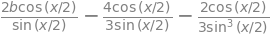

In [40]:
from sympy import *
init_printing()
x = Symbol('x')
b = Symbol('b')
# integrate(1/sin(x)**4*(3+cos(x)**2)**2,x)
integrate(1/sin(x/2)**4-b/sin(x/2)**2,x)


In [144]:
# zufallsgenerator Mottstreuung
angle_cut = 0.0016
def møller_int(x):
    return (x+2*np.tan(x/2)**3/3+2*np.tan(x/2)-2/np.tan(x/2)-2/3/np.tan(x/2)**3)

import random
def mott_int(y,a):
    return (2*a*np.cos(y/2)/np.sin(y/2)-4*np.cos(y/2)/3/np.sin(y/2)-2*np.cos(y/2)/3/np.sin(y/2)**3)

def mott(x,b):
    return 1/np.sin(x/2)**4-b/np.sin(x/2)**2


def rand_mott(rand,beta):
    A_mot = mott_int(np.pi,beta)-mott_int(angle_cut,beta)
    a1 = 1/np.sin(1/2)**4
    a2 = np.pi**4*(1-b)
    A1 = a1/3*(1/angle_cut**3-1)
    A2 = a2/3*(1-1/np.pi**4)
    rand *= (A1+A2)
    if rand <= A1:
        x = (1/angle_cut**3-3*rand/a1)**(-1/3)
        if ((random.random()*a1/x**4)<=(mott(x,beta)/A_mot*(A1+A2))):
            return x
        else:
            return -1
    else:
        x = (1-3/a2*(rand-A1))**(-1/3)
        if ((random.random()*a2/x**4)<=(mott(x,beta)/A_mot*(A1+A2))):
            return x
        else:
            return -1

alpha = 1/137
def møller(x):
    return 1/np.sin(x)**4*(3+np.cos(x)**2)**2

def møller_int(x):
    return (x+2*np.tan(x/2)**3/3+2*np.tan(x/2)-2/np.tan(x/2)-2/3/np.tan(x/2)**3)

def x4_inv(a,A,x0,y):
    return (1/x0**3-3/a*(y-A))**(-1/3)

def x4_inv_rh(a,A,x0,y):
    return (np.pi-(1/(np.pi-x0)**3-3/a*(y-A))**(-1/3))

A_mø = møller_int(np.pi-0.1)-møller_int(0.1)
mø_a1= møller(np.pi/2)*(np.pi)**4
mø_a2 = møller(1)
mø_a3 = møller(1/2)/2**4
mø_A1 = mø_a1/3*(1/angle_cut**3-2**3)
mø_A2 = mø_a2/3*(2**3-1)
mø_A3 = mø_a3/3*(1-(2/np.pi)**3)
def rand_møller(rand):
    rand *= A_mø
    if (rand<mø_A1):
        x = x4_inv(mø_a1,0,angle_cut,rand)
        if (random.random()*mø_a1/x**4 <= møller(x)/A_mø*2*(mø_A1+mø_A2+mø_A3)):
            return x
        else:
            return -1
    elif (rand>= mø_A1 and rand<(mø_A2+mø_A1)):
        x = x4_inv(mø_a2,mø_A1,0.5,rand)
        if (random.random()*mø_a2/x**4 <= møller(x)/A_mø*2*(mø_A1+mø_A2+mø_A3)):
            return x
        else:
            return -1
    elif (rand>= (mø_A2+mø_A1) and rand<(mø_A2+mø_A3+mø_A1)):
        x = x4_inv(mø_a3,mø_A1+mø_A2,1,rand)
        if (random.random()*mø_a3/x**4 <= møller(x)/A_mø*2*(mø_A1+mø_A2+mø_A3)):
            return x
        else:
            return -1
    elif (rand>= (mø_A2+mø_A1+mø_A3) and rand<(mø_A2+mø_A3*2+mø_A1)):
        x = x4_inv_rh(mø_a3,mø_A1+mø_A2+mø_A3,np.pi-1,rand)
        if (random.random()*mø_a3/x**4 <= møller(x)/A_mø*2*(mø_A1+mø_A2+mø_A3)):
            return x
        else:
            return -1
    elif (rand>= (mø_A2+mø_A1+mø_A3*2) and rand<(mø_A2*2+mø_A3*2+mø_A1)):
        x = np.pi-x4_inv(mø_a2,mø_A1+mø_A2+2*mø_A3,0.5,rand)
        if (random.random()*mø_a2/x**4 <= møller(x)/A_mø*2*(mø_A1+mø_A2+mø_A3)):
            return x
        else:
            return -1
    elif (rand>= (mø_A2+mø_A1*2+mø_A3*2) and rand<(mø_A2*2+mø_A3*2+mø_A1*2)):
        x = np.pi-x4_inv(mø_a1,mø_A1+mø_A2*2+2*mø_A3,angle_cut,rand)
        if (random.random()*mø_a1/(np.pi-x)**4 <= møller(x)/A_mø*2*(mø_A1+mø_A2+mø_A3)):
            return x
        else:
            return -1

import scipy.constants as cons
lamb= 0.9*1000/cons.u/(28)*(4*2.625+2+2*16.762)*2.8002852/10**21
lamb2=lamb/cons.c/cons.hbar/cons.eV
def rand_free_wl(rand):
    return -np.log(1-rand)/lamb

print(1/cons.c/cons.hbar/cons.eV)
lamb
    

1.9742072490999566e+44


2494721137.1936636

In [16]:
def rot_z(cos,sin):
    return np.array([[cos,-sin,0],[sin,cos,0],[0,0,1]])
def rot_y(cos,sin):
    return np.array([[cos,0,-sin],[0,1,0],[sin,0,cos]])


In [34]:
import scipy.constants as cons
lamb = 0.9*1000/cons.u/(28)*(4*2.625+2+2*16.762)*2.8002852/10**21
me = 0.511

def vb(T):
    return np.sqrt(1-1/gamm(T)**2)

def p_cm(T):
    return gamm(T)*(p0(T)-vb(T)*(T+me))

def p2(p,theta):
    return (2*me*(np.sqrt(p**2+me**2))*p*np.cos(theta)/(p**2+me**2-p**2*np.cos(theta)**2))

def my_p2(p,theta,T):
    return p**2/(2*me*T)*(p-(T+me)/p*T)/T**2*np.sqrt(np.cos(theta)**2*T**4+2*np.cos(theta)*T**2*p**2+2*p**4)

def E_kin(p):
    return np.sqrt(p**2+me**2)-me

def gamm(T):
    return (T+me)/np.sqrt(2*me**2+2*T*me)

def angle(E,theta):
    return np.sin(theta)/gamm(E)/(1+np.cos(theta))

def p0(T):
    return np.sqrt((T+me)**2-me**2)

def v0(T):
    return p0(T)/(T+me)
def my_VB(T):
    v = v0(T)
    return 1/v-1/v*np.sqrt(1-v**2)

def gam(v):
    return 1/np.sqrt(1-v**2)


def my_p1(T):
    return gam(my_VB(T))*(p0(T)-my_VB(T)*gam(v0(T))*me)

def E1(T):
    return gam(my_VB(T))*((T+me)-my_VB(T)*p0(T))


def p2x(T,theta):
    return gam(my_VB(T))*(my_p1(T)*np.cos(theta)+my_VB(T)*E1(T))

def p2_mod(T,theta):
    return np.sqrt(p2x(T,theta)**2+my_p1(T)**2*np.sin(theta)**2)
def unit_v(thet,phi):
    return np.array([np.sin(thet)*np.cos(phi),np.sin(thet)*np.sin(phi),np.cos(thet)])

T=20
print(E_kin(p2(p0(T),0.12)))
print(T-1/lamb/T)

67.37215153121308
19.99999999997996


2.0042320263596874e-38
0.19933422157502612


/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1022/1247650364.py:6: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-1/gamm(T)**2)


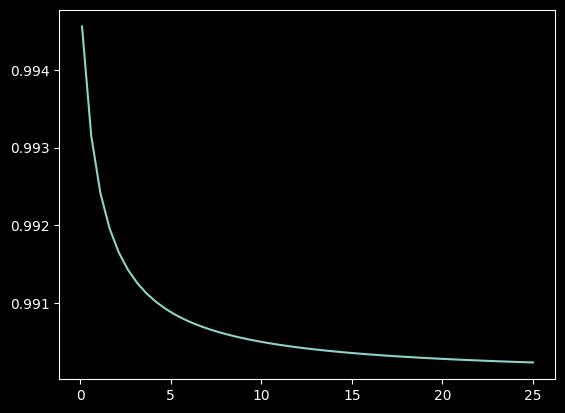

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1022/1247650364.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/v-1/v*np.sqrt(1-v**2)
/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1022/1247650364.py:33: RuntimeWarning: invalid value encountered in double_scalars
  return 1/v-1/v*np.sqrt(1-v**2)


nan

In [28]:

T=20
print(1/lamb/T)
print(T-np.sqrt(p2_mod(T,0.2)**2+me**2)+me)
T = np.linspace(0.1,25)
p = np.sqrt((T+me)**2-me**2)
pc = p_cm(T)
# p_ac = p2x(T)
fig, ax = plt.subplots(1,1)
ax.plot(T,p2_mod(T,0.2)/p)
plt.show()
my_VB(0)

In [159]:
angle_cut = 0.0008
numb_e =20
trajectories = []
lamb= 0.9*1000/cons.u/(28)*(4*2.625+2+2*16.762)*2.8002852/10**21
lamb=lamb
count_store = np.zeros(numb_e+1)
count =0
Tmin = 0.52
for iter in range(numb_e):
    trajectories.append(np.zeros((1000000,3)))
    direction = np.array([0,0,1])
    T = 20
    count_store[iter] =count
    count =0
    p_L = np.array([0,0,1])
    x_store = np.zeros(1000000)
    while (T>=Tmin):
        count +=1
        rando = random.random()
        x = rand_free_wl(rando)
        if x>T**2:
            print(x)
            break
        T=T-x/T*10**6
        x_store[count]=x
        trajectories[iter][count,:]=trajectories[iter][count-1,:]+p_L*x
        thet = -1
        if (random.random()<1/2):
            while (thet==-1):
                thet = rand_mott(random.random(),v0(T))
            if thet>=0.2:
                T= np.sqrt(p2_mod(T,thet)**2+me**2)-me

        else:
            while (thet==-1):
                thet = rand_møller(random.random())
        PL_mod = np.sqrt(p_L[0]**2+p_L[1]**2+p_L[2]**2)
        rho_L = np.sqrt(p_L[0]**2+p_L[1]**2)
        if PL_mod==0:
            cos_thet = 1
            sin_thet = 0
            cos_phi = 1
            sin_phi = 0
        elif rho_L ==0:
            cos_thet = 1
            sin_thet = 0
            cos_phi = 1
            sin_phi = 0
        else:
            cos_thet = p_L[2]/PL_mod
            sin_thet = rho_L/PL_mod
            cos_phi = p_L[0]/rho_L
            sin_phi = p_L[1]/rho_L
        p_L = np.matmul(rot_z(cos_phi,sin_phi),np.matmul(rot_y(cos_thet,-sin_thet),unit_v(thet,random.random()*2*np.pi)))
        if count==1000000-1:
            print(T)
            print(x_store)
            break
        elif (T<=20==False):
            print(T)
            break
        
count_store[numb_e]=count


In [128]:
trajectories_save, count_store_save = trajectories, count_store

In [153]:
trajectories_save2, count_store_save2 = trajectories, count_store

In [156]:
trajectories, count_store= trajectories_save2, count_store_save2

In [126]:
from numba import njit, vectorize, int32, int64, float32, float64, boolean

numb_e =20

trajectories = []
lamb= 0.9*1000/cons.u/(28)*(4*2.625+2+2*16.762)*2.8002852/10**21
lamb=lamb
count_store = np.zeros(numb_e+1)
count =0
Tmin = 0.52
@njit
def iterator():
    for iter in range(numb_e):
        trajectories.append(np.zeros((1000000,3)))
        direction = np.array([0,0,1])
        T = 20
        count_store[iter] =count
        count =0
        p_L = np.array([0,0,1])
        x_store = np.zeros(1000000)
        while (T>=Tmin):
            count +=1
            rando = random.random()
            x = rand_free_wl(rando)
            if x>T**2:
                print(x)
                break
            T=T-x/T*10**6
            x_store[count]=x
            trajectories[iter][count,:]=trajectories[iter][count-1,:]+p_L*x
            thet = -1
            if (random.random()<1/2):
                while (thet==-1):
                    thet = rand_mott(random.random(),v0(T))
                if thet>=0.2:
                    T= np.sqrt(p2_mod(T,thet)**2+me**2)-me

            else:
                while (thet==-1):
                    thet = rand_møller(random.random())
            PL_mod = np.sqrt(p_L[0]**2+p_L[1]**2+p_L[2]**2)
            rho_L = np.sqrt(p_L[0]**2+p_L[1]**2)
            if PL_mod==0:
                cos_thet = 1
                sin_thet = 0
                cos_phi = 1
                sin_phi = 0
            elif rho_L ==0:
                cos_thet = 1
                sin_thet = 0
                cos_phi = 1
                sin_phi = 0
            else:
                cos_thet = p_L[2]/PL_mod
                sin_thet = rho_L/PL_mod
                cos_phi = p_L[0]/rho_L
                sin_phi = p_L[1]/rho_L
            p_L = np.matmul(rot_z(cos_phi,sin_phi),np.matmul(rot_y(cos_thet,-sin_thet),unit_v(thet,random.random()*2*np.pi)))
            if count==1000000-1:
                print(T)
                print(x_store)
                break
            elif (T<=20==False):
                print(T)
                break
        
    count_store[numb_e]=count
    return trajectories, count_store
trajectories, count_store =iterator()


NotDefinedError: Failed in nopython mode pipeline (step: analyzing bytecode)
The compiler failed to analyze the bytecode. Variable 'count' is not defined.

File "../../../../../../../var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1022/3861024108.py", line 17:
<source missing, REPL/exec in use?>


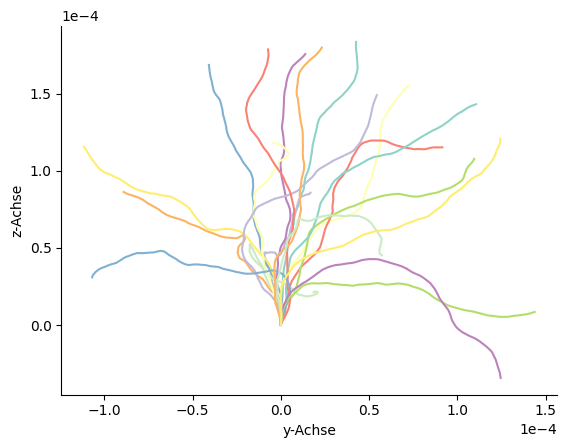

In [157]:
plt.figure(facecolor="white")

ax = plt.axes()
ax.set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.ticklabel_format(style='scientific',scilimits=(-3,3))
ax.tick_params(axis='y', colors='black')
ax.set_xlabel('y-Achse')
ax.set_ylabel('z-Achse')
for iter in range(numb_e):
    count = int(count_store[iter+1])
    
    points = trajectories[iter][:count,:]
    ax.plot(points[:,1],points[:,2])
plt.show()

[     0. 497344. 498227. 497034. 499868. 498261. 498776. 498547. 499336.
 498836. 498669. 496841. 497945. 497267. 499388. 497744. 497712. 499191.
 498874. 499297. 496993.]


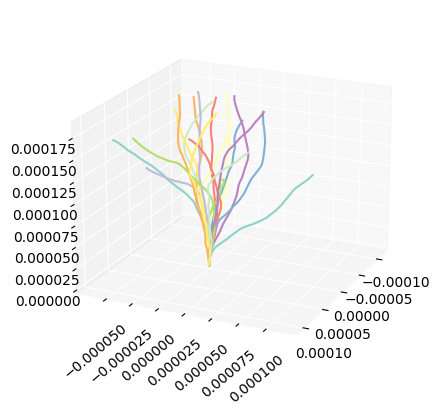

In [173]:
# import matplotlib.pyplot as plt
# %matplotlib notebook

print(count_store)
# plt.legend(['1','2'],labelcolor='linecolor',facecolor='white')
ax = plt.figure(facecolor='white').add_subplot(projection='3d')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.zaxis.label.set_color('black')
ax.tick_params(axis='y', colors='black',labelrotation=40)
ax.tick_params(axis='x', colors='black')#,labelrotation=40)

ax.tick_params(axis='z', colors='black')
ax.set_facecolor("white")
# ax.ticklabel_format(axis='y',style='scientific',scilimits=(-3,3))
ax.view_init(20,25,0)
for iter in range(numb_e):
    count = int(count_store[iter+1])
    
    points = trajectories[iter][:count,:]
    ax.plot(points[:,0],points[:,1],points[:,2])
plt.show()


In [42]:
# for i in range(15):
    # print(rand_mott(random.random(),0.7))
beta = 0.7
A_mot = mott_int(np.pi,beta)-mott_int(0.1,beta)
A_mø = møller_int(np.pi-0.1)-møller_int(0.1)
print(A_mot)
print(A_mø)
møller(0.1)
(18*u)

5331.9988873095235
10722.692358908704


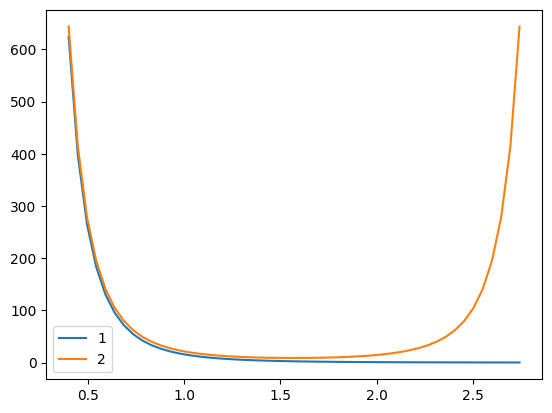

In [27]:
import numpy as np
import matplotlib.pyplot as plt
(3+np.cos(1/2)**2)**2/np.sin(1/2)**4/2**2
1/0.13**3
b=0.7
x = np.linspace(0.4,np.pi-0.4)
y = møller(x)
y3 = mott(x,0.7)
a = møller(0.5)/2**4
y2 = a/x**4
fig, ax = plt.subplots(1,1)
ax.plot(x,y3)
ax.plot(x,y)
plt.legend(['1','2'])
plt.show()